# CAT vs DOG Image Recogniton Using CNN

# About Dataset
The Dataset is downloaded from kaggle
link-'!kaggle competitions download -c dogs-vs-cats'

Over a 25000 images of cats and dogs scraped off of google images. The problem statement is to build a model that can classify between a cat and a dog in an image as accurately as possible.

Image sizes range from roughly 100x100 pixels to 2000x1000 pixels.



In [1]:
# Importing necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# install kaggle for kaggle dataset
#!pip install kaggle

In [3]:
# Importing kaggle dataset Dogs vs Cats
os.environ['KAGGLE_USERNAME'] = 'ashitshende'
os.environ['KAGGLE_KEY'] = '3c147d5fea6bc83f9664d761a0696292'

!kaggle competitions download -c dogs-vs-cats

In [4]:
# directory path
filepath='C:\\Users\\Ashit\\dogs-vs-cats\\train\\train'


In [5]:
# number of images in directory
print(len(os.listdir(filepath)),'images')


25000 images


let's find out how images are stored in file

In [6]:
# 12 random integers from 0-25000
arr=np.random.randint(0,25000,12)

# list of image names in train set
image_list=os.listdir(filepath)

# print image names
for i in arr:
  print(image_list[i])

cat.6155.jpg
dog.11135.jpg
cat.9616.jpg
cat.4230.jpg
dog.478.jpg
dog.766.jpg
cat.1223.jpg
dog.11660.jpg
dog.10002.jpg
cat.1502.jpg
cat.4398.jpg
dog.10735.jpg


we have data of labeled images and we have to transform images into input(Independent variable) and their labels into target variable for supervised learning

### Preprocessing Images

In [7]:
# Preprocessing Images
from tensorflow.keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator

In [8]:

# function for reading images and converting into numpy array
def reading_image(filepath):
    # filepath-path of Directory where images are stored
    
    for img in os.listdir(filepath):
        
        if (img.endswith('.jpg')):
            img_path=os.path.join(filepath,img)

            # read image
            read_image=load_img(img_path,color_mode='rgb',target_size=(100,100))

            # converting image to numpy array
            img_arr=img_to_array(read_image)

            # appending image to X
            X.append(img_arr)

            # appending image title to y
            if(img.startswith('dog')):
              y.append('dog')
            else:
              y.append('cat')
        
            
        

In [9]:
# ceating list for storing independent and response variables
X=[]
y=[]

In [10]:
# converting data into independent and response varaibles 
reading_image(filepath)


In [11]:
len(X)

25000

In [12]:
len(y)

25000

### Data Visualization

<Figure size 3600x3600 with 0 Axes>

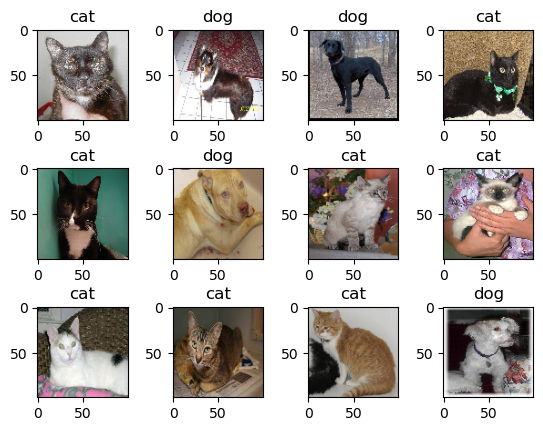

In [13]:
plt.figure(figsize=(36,36))
plt.subplots(4,3)
plt.subplots_adjust(hspace=0.5,wspace=0.5)

count=0

for i in np.random.randint(0,len(X),12):
  count+=1
  plt.subplot(3,4,0+count)
  plt.imshow(X[i].astype('uint8'))
  plt.title(y[i])

plt.show()

### splitting dataset into training ,validation and testing set

In [14]:
# splitting the data into training set and testing set
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,shuffle=True,stratify=y,random_state=32)

In [15]:
# splitting the data into training set and validation set
Xtrain,Xval,ytrain,yval=train_test_split(Xtrain,ytrain,test_size=0.2,shuffle=True,stratify=ytrain,random_state=32)

In [16]:
len(Xtrain)

16000

In [17]:
len(ytrain)

16000

In [18]:
len(Xtest)

5000

In [19]:
len(ytest)

5000

In [20]:
len(Xval)

4000

In [21]:
len(yval)

4000

### converting independent variable(X) from list to array

In [22]:
Xtrain=np.array(Xtrain)
Xtest=np.array(Xtest)
Xval=np.array(Xval)

### Encoding target variable

In [23]:
# encoding labels(cats,dogs) into (0,1)

from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()

ytrain=lbl.fit_transform(ytrain)
ytest=lbl.transform(ytest)


In [24]:
yval=lbl.transform(yval)

In [25]:
lbl.classes_

array(['cat', 'dog'], dtype='<U3')

### scaling the data

In [26]:
# max value in Xtrain
np.max(Xtrain)

255.0

In [27]:
# min value in Xtrain
np.min(Xtrain)

0.0

In [28]:
# we can scale X with dividing X with 255.0
Xtrain=Xtrain/255.0
Xtest=Xtest/255.0
Xval=Xval/255.0

In [29]:
# shape of train,validation,test sets
print('Xtrain--->',Xtrain.shape)
print('ytrain--->',ytrain.shape)
print('Xval--->',Xval.shape)
print('yval--->',yval.shape)
print('Xtest--->',Xtest.shape)
print('ytest--->',ytest.shape)


Xtrain---> (16000, 100, 100, 3)
ytrain---> (16000,)
Xval---> (4000, 100, 100, 3)
yval---> (4000,)
Xtest---> (5000, 100, 100, 3)
ytest---> (5000,)


# CNN Model

In [30]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D

In [31]:
# building sequential model 
pet_ANN=Sequential()

In [32]:
pet_ANN.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
pet_ANN.add(MaxPooling2D(pool_size=(2,2)))
            

pet_ANN.add(Conv2D(64,(3,3),activation='relu'))
pet_ANN.add(MaxPooling2D(pool_size=(2,2))) 
pet_ANN.add(Dropout(rate=0.1))
            
pet_ANN.add(Conv2D(64,(3,3),activation='relu'))
pet_ANN.add(MaxPooling2D(pool_size=(2,2)))
pet_ANN.add(Dropout(rate=0.1))
            
pet_ANN.add(Conv2D(64,(3,3),activation='relu'))
pet_ANN.add(MaxPooling2D(pool_size=(2,2)))


            
pet_ANN.add(Flatten())
pet_ANN.add(Dense(units=1,activation='sigmoid'))


In [33]:
# callabcks
from keras.callbacks import ModelCheckpoint,EarlyStopping

mc=ModelCheckpoint(filepath='pet_best.h5',monitor='val_accuracy',mode='max',verbose=1,save_best_only=True)

es=EarlyStopping(patience=10,monitor='val_accuracy',verbose=1,mode='max')

ModelCheckpoint -is to save the model's weights at specified intervals (epochs) during training.and to select the best model based on its performance during training.

Earlystopping-is to continuously monitor a metric (e.g., validation loss or accuracy) during training and stop the training process if the metric does not improve for a certain number of epochs

In [34]:
# learning rate
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from keras.optimizers import Adam

#ExponentialDecay - with iterations reduce the learning rate
initial_learning_rate = 0.001
lr=ExponentialDecay(initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

# Compiling ANN model
pet_ANN.compile(loss='binary_crossentropy',
                  metrics=['accuracy'],
                  optimizer=Adam(learning_rate=lr)
                  )


### Training

In [ ]:
# Training ANN Model and storing in history
history=pet_ANN.fit(Xtrain,ytrain,validation_data=(Xval,yval),epochs=20,verbose=1,callbacks=[mc,es])

Epoch 1/20
500/500 [==============================] - ETA: 0s - loss: 0.6074 - accuracy: 0.6531
Epoch 1: val_accuracy improved from -inf to 0.72625, saving model to pet_best.h5
500/500 [==============================] - 279s 537ms/step - loss: 0.6074 - accuracy: 0.6531 - val_loss: 0.5533 - val_accuracy: 0.7262
Epoch 2/20
500/500 [==============================] - ETA: 0s - loss: 0.5064 - accuracy: 0.7464
Epoch 2: val_accuracy improved from 0.72625 to 0.74700, saving model to pet_best.h5
500/500 [==============================] - 237s 474ms/step - loss: 0.5064 - accuracy: 0.7464 - val_loss: 0.5171 - val_accuracy: 0.7470
Epoch 3/20
500/500 [==============================] - ETA: 0s - loss: 0.4529 - accuracy: 0.7901
Epoch 3: val_accuracy improved from 0.74700 to 0.77475, saving model to pet_best.h5
500/500 [==============================] - 237s 474ms/step - loss: 0.4529 - accuracy: 0.7901 - val_loss: 0.4776 - val_accuracy: 0.7747
Epoch 4/20
500/500 [==============================] - ETA:

In [ ]:
### Model Architect
pet_ANN.summary()

## plot of loss and accuracy

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.title('Loss and Validation loss every epoch')
plt.show()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Validation'])
plt.title('accuracy and Validation accuracy every epoch')
plt.show()

we can see from the plots that :even after hyperparameter tuning,keras callabcks(ModelCheckpoint,earlystoping) and Dropout regularization we still have problem of overfitting.

# Model Performance

In [ ]:
# ANN model performance on test set
pet_ANN.evaluate(Xtest,ytest)

bestmodel based on highest validation accuracy

In [ ]:
# bestmodel with highest validation accuracy
from keras.models import load_model
best_model=load_model(filepath='pet_best.h5')

In [ ]:
# bestmodel performance on test set
best_model.evaluate(Xtest,ytest)

# Conclusion


In this project we successfully built a CNN classifier to distinguish between images of dogs and cats. With careful preprocessing, hyperparameter tuning,Callabcks and regularization, the model achieved a test accuracy of 0.8788. Further improvements in image size and hyperparameter tuning and reduction in overfitting could potentially enhance accuracy.the project demonstrates the effectiveness of deep learning in Python for image classification tasks.